<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P4_01_notebookanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [127]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 4

[Errno 2] No such file or directory: 'drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 4'
/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 4


Importation des librairies nécessaires au projet

In [129]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

Importation des données

In [130]:
df_customers = pad.read_csv('olist_customers_dataset.csv')
df_geolocation = pad.read_csv('olist_geolocation_dataset.csv')
df_items = pad.read_csv('olist_order_items_dataset.csv')
df_payments = pad.read_csv('olist_order_payments_dataset.csv')
df_reviews = pad.read_csv('olist_order_reviews_dataset.csv')
df_orders = pad.read_csv('olist_orders_dataset.csv')
df_products = pad.read_csv('olist_products_dataset.csv')
df_sellers = pad.read_csv('olist_sellers_dataset.csv')
df_category_name = pad.read_csv('product_category_name_translation.csv')

Exploration rapide des données

In [131]:
print("Constitution de la df customers : " + str(df_customers.shape))
print("Constitution de la df geolocation : " + str(df_geolocation.shape))
print("Constitution de la df items : " + str(df_items.shape))
print("Constitution de la df payments : " + str(df_payments.shape))
print("Constitution de la df reviews : " + str(df_reviews.shape))
print("Constitution de la df orders : " + str(df_orders.shape))
print("Constitution de la df products : " + str(df_products.shape))
print("Constitution de la df sellers : " + str(df_sellers.shape))
print("Constitution de la df category_name : " + str(df_category_name.shape))

Constitution de la df customers : (99441, 5)
Constitution de la df geolocation : (1000163, 5)
Constitution de la df items : (112650, 7)
Constitution de la df payments : (103886, 5)
Constitution de la df reviews : (99224, 7)
Constitution de la df orders : (99441, 8)
Constitution de la df products : (32951, 9)
Constitution de la df sellers : (3095, 4)
Constitution de la df category_name : (71, 2)


In [132]:
print("Features de la df customers : " + str(df_customers.columns))
print("Features de la df geolocation : " + str(df_geolocation.columns))
print("Features de la df items : " + str(df_items.columns))
print("Features de la df payments : " + str(df_payments.columns))
print("Features de la df reviews : " + str(df_reviews.columns))
print("Features de la df orders : " + str(df_orders.columns))
print("Features de la df products : " + str(df_products.columns))
print("Features de la df sellers : " + str(df_sellers.columns))
print("Features de la df category_name : " + str(df_category_name.columns))

Features de la df customers : Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Features de la df geolocation : Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
Features de la df items : Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Features de la df payments : Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Features de la df reviews : Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
Features de la df orders : Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'or

# Création d'une dataframe incluant toutes les informations

In [133]:
df_customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [134]:
df_geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [135]:
df_geolocation = df_geolocation.rename(columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"})

In [136]:
# pour faire le merge je souhaite utiliser la colonne "zip code" commune aux deux dataframes, cependant il y a plusieurs lat et lng pour un même zip code, je risque d'avoir des valeurs dupliquées si je n'obtient pas une seule valeur pour lat et lng par customer
df_geoloc_lat_lng = pad.merge(df_customers, df_geolocation, how='left', on="customer_zip_code_prefix").groupby('customer_unique_id').mean()[['geolocation_lat', 'geolocation_lng']].reset_index()

In [137]:
df_geoloc_lat_lng.head(3)

,customer_unique_id,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,-23.340235,-46.830140
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-23.559115,-46.787626
2,0000f46a3911fa3c0805444483337064,-27.542880,-48.633426


In [138]:
df_total = pad.merge(df_customers,df_geoloc_lat_lng, on='customer_unique_id')

In [139]:
#Pour vider la RAM de colab...
del df_geoloc_lat_lng
del df_geolocation
del df_customers

In [140]:
df_total.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289


In [141]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [142]:
df_total = pad.merge(df_total, df_orders, on="customer_id", how='left')

In [143]:
#Pour vider la RAM de colab...
del df_orders

In [144]:
df_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [145]:
df_total = pad.merge(df_total, df_items, on="order_id", how='left')

In [146]:
#Pour vider la RAM de colab...
del df_items

In [147]:
df_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [148]:
df_total = pad.merge(df_total, df_payments, on="order_id", how='left')

In [149]:
#Pour vider la RAM de colab...
del df_payments

In [150]:
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [151]:
df_category_name.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [152]:
# Les noms des produits sont en portugais, pour plus de lisibilité on peut utliser la df_categeory_name qui correspond à la traduction en anglais :
df_products = df_products.merge(df_category_name, on='product_category_name', how='left')
df_products.drop ('product_category_name', axis=1, inplace=True)

In [153]:
df_products.head(3)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [154]:
df_total = pad.merge(df_total, df_products, on="product_id", how='left')

In [155]:
#Pour vider la RAM de colab...
del df_category_name
del df_products

In [156]:
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [157]:
df_total = pad.merge(df_total, df_reviews, on="order_id", how='left')

In [158]:
#Pour vider la RAM de colab...
del df_reviews

In [159]:
df_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [160]:
df_total = pad.merge(df_total, df_sellers, on="seller_id", how='left')

In [161]:
#Pour vider la RAM de colab...
del df_sellers

In [162]:
df_total.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,8577.0,itaquaquecetuba,SP


In [163]:
df = df_total

In [164]:
df.shape

(119143, 41)

In [165]:
df.describe()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,seller_zip_code_prefix
count,119143.000000,118825.000000,118825.000000,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118146.000000,118310.000000
mean,35033.451298,-21.229809,-46.191148,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,4.015582,24442.410413
std,29823.198969,5.563507,4.041532,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,1.400436,27573.004511
min,1003.000000,-33.689948,-72.668881,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1001.000000
25%,11250.000000,-23.589488,-48.097776,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,6429.000000
50%,24240.000000,-22.928413,-46.631239,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,13660.000000
75%,58475.000000,-20.180863,-43.607441,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,27972.000000
max,99990.000000,42.184003,-8.723762,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,99730.000000


# Nettoyage des données

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   geolocation_lat                118825 non-null  float64
 6   geolocation_lng                118825 non-null  float64
 7   order_id                       119143 non-null  object 
 8   order_status                   119143 non-null  object 
 9   order_purchase_timestamp       119143 non-null  object 
 10  order_approved_at              118966 non-null  object 
 11  order_delivered_carrier_date   117057 non-null  object 
 12  order_delivered_customer_date 

Globalement toutes les variables ont des données suffisantes en quantité, il n'y a que le titre et le contenu des commentaires qui n'est pas conséquent (plus de 50% de NaN), je fais donc le choix de supprimer ces variables

In [167]:
df.drop(['review_comment_title'], axis=1, inplace=True)
df.drop(['review_comment_message'], axis=1, inplace=True)

Les variables correspondant à des dates ne sont pas au format datetime ce qui rendra difficile le feature engineering les utilisant.

Je transforme donc le type de ces variables

In [168]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].astype('datetime64')
df['order_approved_at'] = pad.to_datetime(df['order_approved_at'], errors='coerce')
df['order_delivered_carrier_date'] = pad.to_datetime(df['order_delivered_carrier_date'], errors='coerce')
df['order_delivered_customer_date'] = pad.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = df['order_estimated_delivery_date'].astype('datetime64')
df['shipping_limit_date'] = df['shipping_limit_date'].astype('datetime64')
df['review_creation_date'] = df['review_creation_date'].astype('datetime64')
df['review_answer_timestamp'] = df['review_answer_timestamp'].astype('datetime64')

In [169]:
# Un pairplot pour visualiser les données (uniquement sur 50 premières données car long à exécuter)
#sns.pairplot(df.head(50))

In [170]:
## POUR CHANGER COULEUR sns.set_palette("bright") 
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette) 

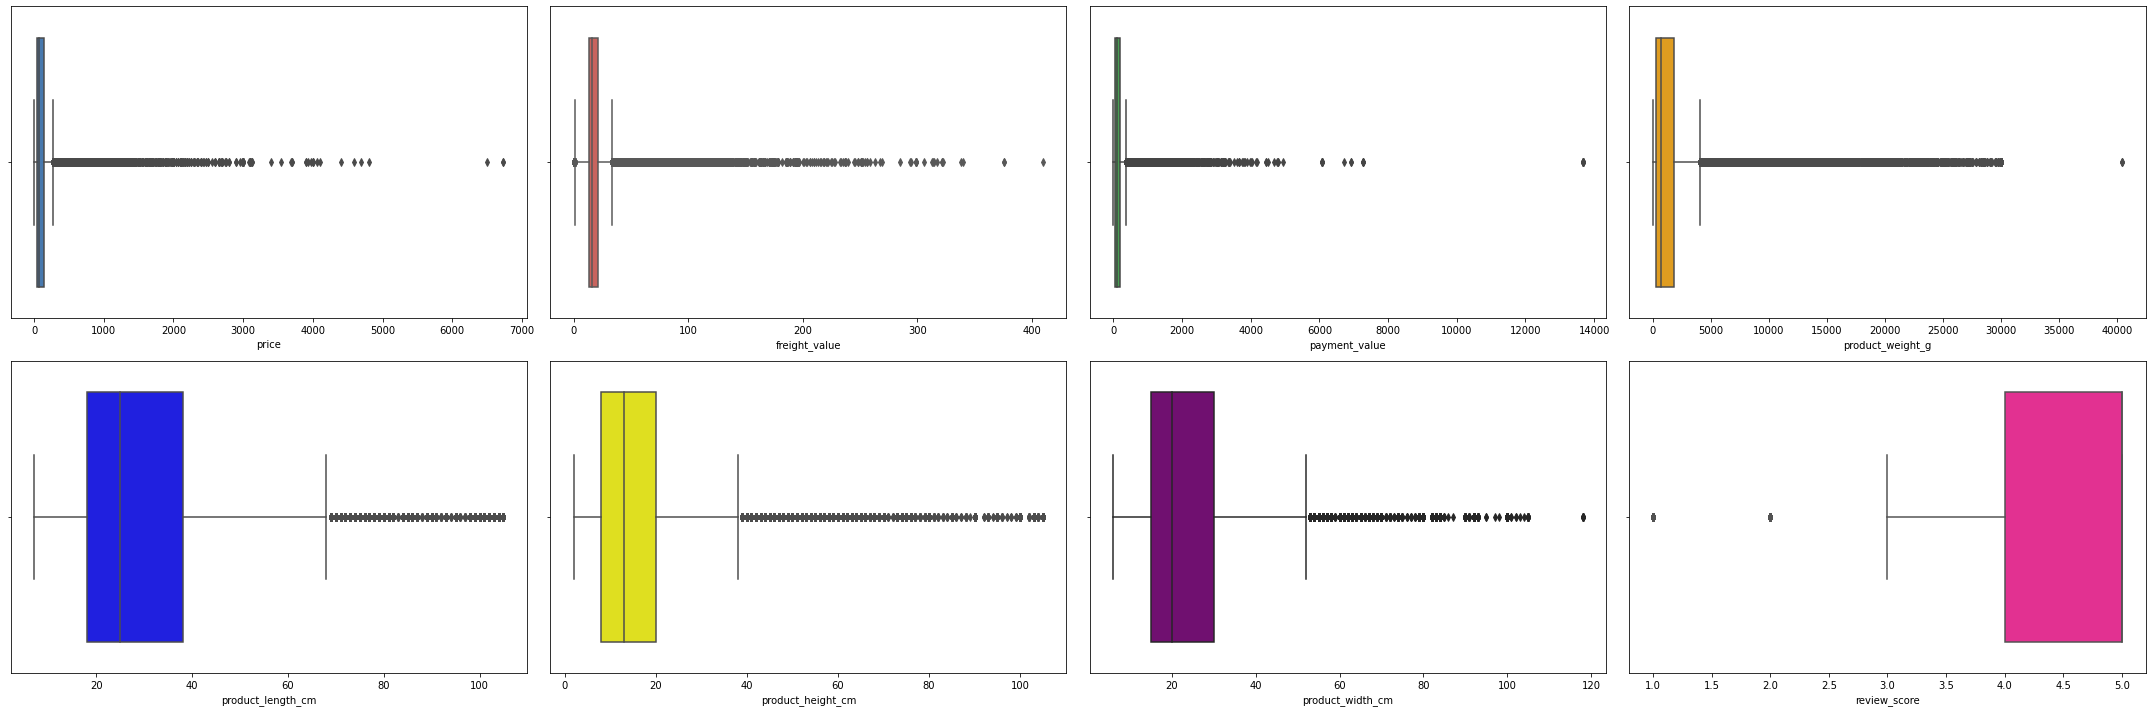

In [171]:
fig, axs = plt.subplots(2, 4, figsize=(30, 10))

sns.boxplot(data=df, x="price", ax=axs[0, 0], color = custom_palette[0])
sns.boxplot(data=df, x="freight_value", ax=axs[0, 1], color = custom_palette[1])
sns.boxplot(data=df, x="payment_value", ax=axs[0, 2], color = custom_palette[2])
sns.boxplot(data=df, x="product_weight_g", ax=axs[0, 3], color = custom_palette[3])
sns.boxplot(data=df, x="product_length_cm", ax=axs[1, 0], color = custom_palette[4])
sns.boxplot(data=df, x="product_height_cm",  ax=axs[1, 1], color = custom_palette[5])
sns.boxplot(data=df, x="product_width_cm",  ax=axs[1, 2], color = custom_palette[6])
sns.boxplot(data=df, x="review_score", ax=axs[1, 3], color = custom_palette[7])


plt.tight_layout()
#fig.savefig("Global_exploration_quantitative_variables_boxplot", dpi=400)
plt.show()

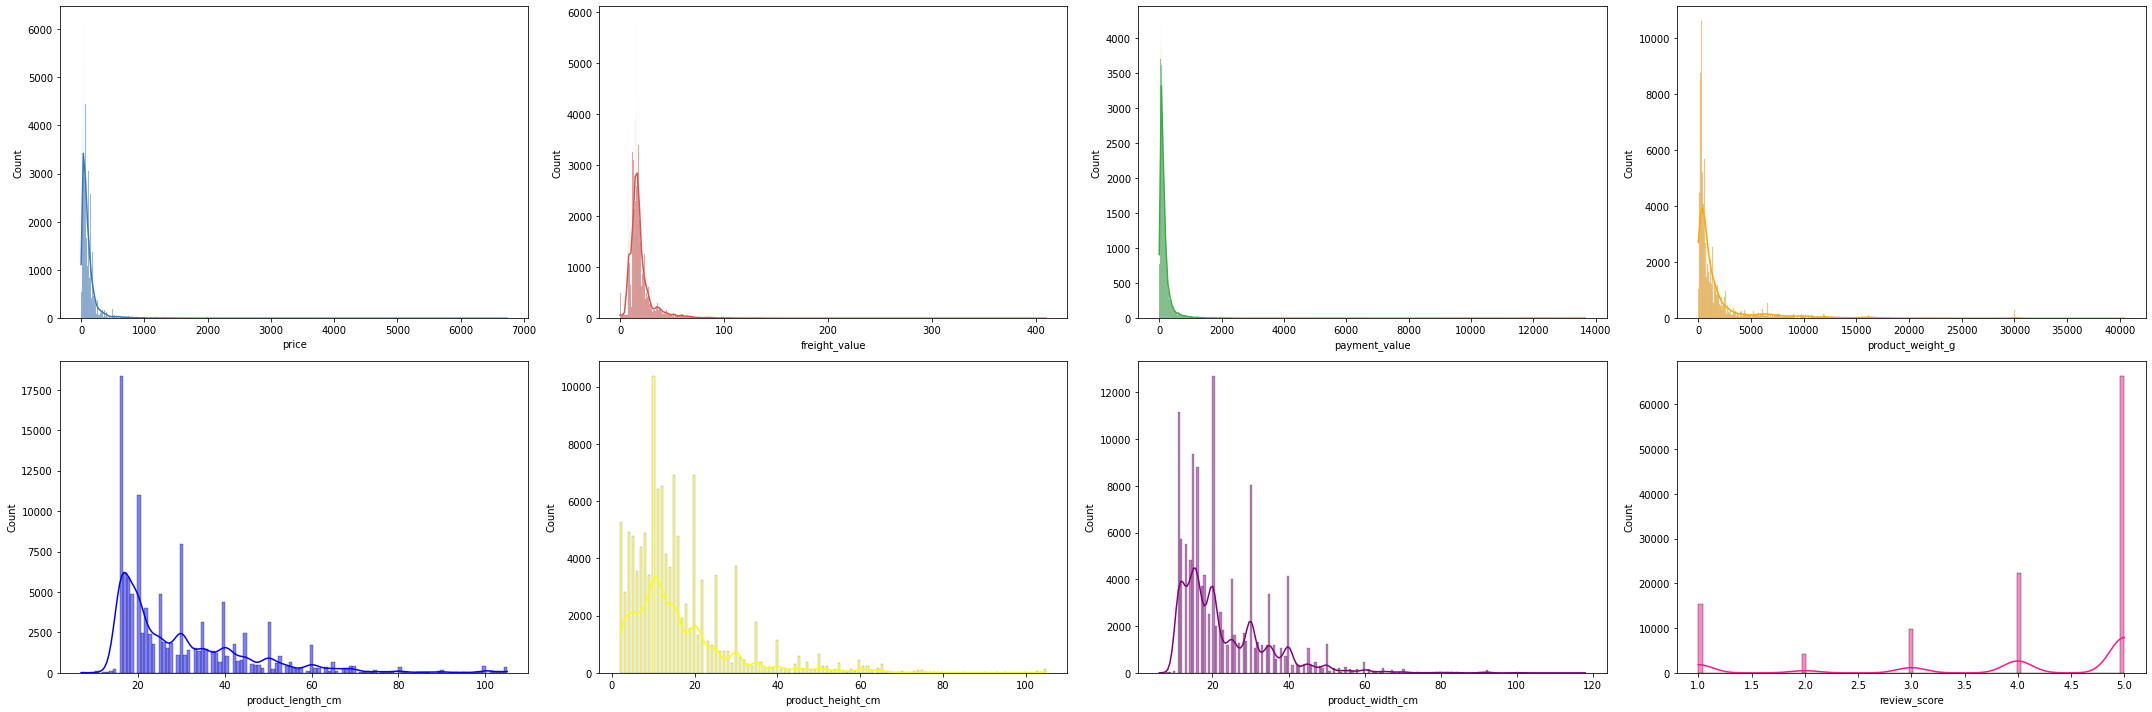

In [172]:
fig, axs = plt.subplots(2, 4, figsize=(30, 10))

sns.histplot(data=df, x="price", kde=True, ax=axs[0, 0], color = custom_palette[0])
sns.histplot(data=df, x="freight_value", kde=True, ax=axs[0, 1], color = custom_palette[1])
sns.histplot(data=df, x="payment_value", kde=True, ax=axs[0, 2], color = custom_palette[2])
sns.histplot(data=df, x="product_weight_g", kde=True, ax=axs[0, 3], color = custom_palette[3])
sns.histplot(data=df, x="product_length_cm", kde=True, ax=axs[1, 0], color = custom_palette[4])
sns.histplot(data=df, x="product_height_cm", kde=True, ax=axs[1, 1], color = custom_palette[5])
sns.histplot(data=df, x="product_width_cm", kde=True, ax=axs[1, 2], color = custom_palette[6])
sns.histplot(data=df, x="review_score", kde=True, ax=axs[1, 3], color = custom_palette[7])


plt.tight_layout()
#fig.savefig("Global_exploration_quantitative_variables_histplot", dpi=400)
plt.show()

In [173]:
df[df['price'] == 6735]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
17359,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,-20.48461,-54.570572,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,1.0,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,1.0,credit_card,8.0,6929.31,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,2017-03-04,2017-03-04 21:40:41,3635.0,sao paulo,SP


In [174]:
df[df['payment_value'] == 13664.080000]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
8091,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,-22.901209,-43.184957,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1.0,credit_card,1.0,13664.08,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony,211fa81a22870cc634265ea85b751e40,1.0,2017-10-18,2017-10-19 13:10:39,3667.0,sao paulo,SP
8092,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,-22.901209,-43.184957,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,2.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1.0,credit_card,1.0,13664.08,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony,211fa81a22870cc634265ea85b751e40,1.0,2017-10-18,2017-10-19 13:10:39,3667.0,sao paulo,SP
8093,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,-22.901209,-43.184957,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,3.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1.0,credit_card,1.0,13664.08,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony,211fa81a22870cc634265ea85b751e40,1.0,2017-10-18,2017-10-19 13:10:39,3667.0,sao paulo,SP
8094,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,-22.901209,-43.184957,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,4.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1.0,credit_card,1.0,13664.08,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony,211fa81a22870cc634265ea85b751e40,1.0,2017-10-18,2017-10-19 13:10:39,3667.0,sao paulo,SP
8095,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,-22.901209,-43.184957,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,5.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1.0,credit_card,1.0,13664.08,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony,211fa81a22870cc634265ea85b751e40,1.0,2017-10-18,2017-10-19 13:10:39,3667.0,sao paulo,SP
8096,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,-22.901209,-43.184957,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,6.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,1.0,credit_card,1.0,13664.08,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,fixed_telephony,211fa81a22870cc634265ea85b751e40,1.0,2017-10-18,2017-10-19 13:10:39,3667.0,sao paulo,SP
8097,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,-22.901209,-43.184957,03caa2c082116e1d31e67e9ae3700499,delivered,

In [175]:
df[df['product_weight_g'] == 40425]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
16940,958279c23050d6207d196c3057648f6f,de00290d2a997f24e1706fdc2d366a0e,11730,mongagua,SP,-24.111896,-46.665437,6ecf1a4051b4c5ed613624b460970a26,delivered,2017-11-17 08:40:57,2017-11-17 08:55:48,2017-11-17 20:36:56,2017-12-01 12:08:23,2017-12-06,1.0,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-11-23 08:55:48,80.0,12.06,1.0,credit_card,2.0,92.06,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,13fe815dc5c4076ab42f34545df82ca1,5.0,2017-12-02,2017-12-04 16:04:31,14940.0,ibitinga,SP
47774,ccd6a4af78390b7ae560c1cc1cb1a2ff,32d0420a22921ea161d8bff0e0297b71,88820,icara,SC,-28.715980,-49.299651,4a45f9f66971302cf881ecfa142f42ba,delivered,2017-12-23 19:03:24,2017-12-23 19:13:20,2017-12-28 15:13:58,2018-01-25 22:17:15,2018-01-29,1.0,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-12-29 19:13:20,80.0,16.32,1.0,credit_card,1.0,96.32,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,62a35e9e362cf9b27b9ee8e047afbedf,1.0,2018-01-26,2018-01-27 00:42:30,14940.0,ibitinga,SP
59567,51934b734e94e61d8efa4523e175c6c3,4fbb5c68b6851f6e35c543f963b43e4c,86455,joaquim tavora,PR,-23.500213,-49.921802,9223919b300f6989e1715333fca0d6ce,delivered,2018-03-01 23:05:31,2018-03-01 23:15:32,2018-03-02 22:33:58,2018-03-27 20:47:27,2018-03-26,1.0,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2018-03-07 23:15:32,80.0,16.32,1.0,credit_card,1.0,96.32,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,1474903cd02494e327de0317af95d846,5.0,2018-03-28,2018-03-30 12:39:00,14940.0,ibitinga,SP


Les valeurs qui pourraient semblées aberrantes sont bien cohérentes avec la logique et je trouve qu'il n'y a pas lieu de faire une sélection des valeurs aberrantes dans ce projet

# Feature engineering

Délai d'expédition des commandes

In [176]:
df["Shipment_duration (hours)"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]) / np.timedelta64(1, 'D')

Délai de réponse aux commentaires

In [177]:
df["Answer_duration (hours)"] = (df["review_answer_timestamp"] - df["review_creation_date"]) / np.timedelta64(1, 'h')

Nombre de jours depuis dernier achat

In [178]:
date = df['order_purchase_timestamp'].max()
df["Time_after_last_purchase (hours)"] = (date - df["order_purchase_timestamp"]) / np.timedelta64(1, 'h')

In [179]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,Shipment_duration (hours),Answer_duration (hours),Time_after_last_purchase (hours)
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,2017-05-30 22:34:40,8577.0,itaquaquecetuba,SP,8.812500,118.577778,12458.411944
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,2018-02-10 22:43:29,88303.0,itajai,SC,16.661748,286.724722,6668.698333
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,2018-06-15 12:10:59,8577.0,itaquaquecetuba,SP,26.077153,12.183056,3625.375833
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,2018-04-02 18:36:47,8577.0,itaquaquecetuba,SP,14.998461,114.613056,5233.394444
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,2018-08-17 01:59:52,14940.0,ibitinga,SP,11.461319,169.997778,1927.646667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.586003,-46.499638,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,5278

# Analyse exploratoire des données

In [180]:
dfQ = df.select_dtypes(include=[np.float])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [181]:
dfQ

,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,seller_zip_code_prefix,Shipment_duration (hours),Answer_duration (hours),Time_after_last_purchase (hours)
0,-20.498489,-47.396929,1.0,124.99,21.88,1.0,2.0,146.87,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,4.0,8577.0,8.812500,118.577778,12458.411944
1,-23.727992,-46.542848,1.0,289.00,46.48,1.0,8.0,335.48,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,5.0,88303.0,16.661748,286.724722,6668.698333
2,-23.531642,-46.656289,1.0,139.94,17.79,1.0,7.0,157.73,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5.0,8577.0,26.077153,12.183056,3625.375833
3,-23.499702,-46.185233,1.0,149.94,23.36,1.0,1.0,173.30,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,5.0,8577.0,14.998461,114.613056,5233.394444
4,-22.975100,-47.142925,1.0,230.00,22.25,1.0,8.0,252.25,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,5.0,14940.0,11.461319,169.997778,1927.646667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,-23.586003,-46.499638,1.0,74.90,13.88,1.0,6.0,88.78,51.0,489.0,2.0,611.0,22.0,22.0,23.0,4.0,17400.0,6.179398,347.251111,4633.700278
119139,-23.615830,-46.768533,1.0,114.90,14.16,1.0,3.0,129.06,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,5.0,14802.0,7.440544,106.601389,4713.165556
119140,-3.734569,-38.510534,1.0,37.00,19.04,1.0,5.0,56.04,60.0,575.0,1.0,870.0,25.0,20.0,18.0,1.0,3304.0,30.952373,97.685278,4605.307778
119141,-29.949839,-51.168494,1.0,689.00,22.07,1.0,2.0,711.07,59.0,452.0,1.0,710.0,19.0,13.0,14.0,5.0,14840.0,12.951458,71.571667,8348.362500


In [182]:
dfQ.dropna(inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


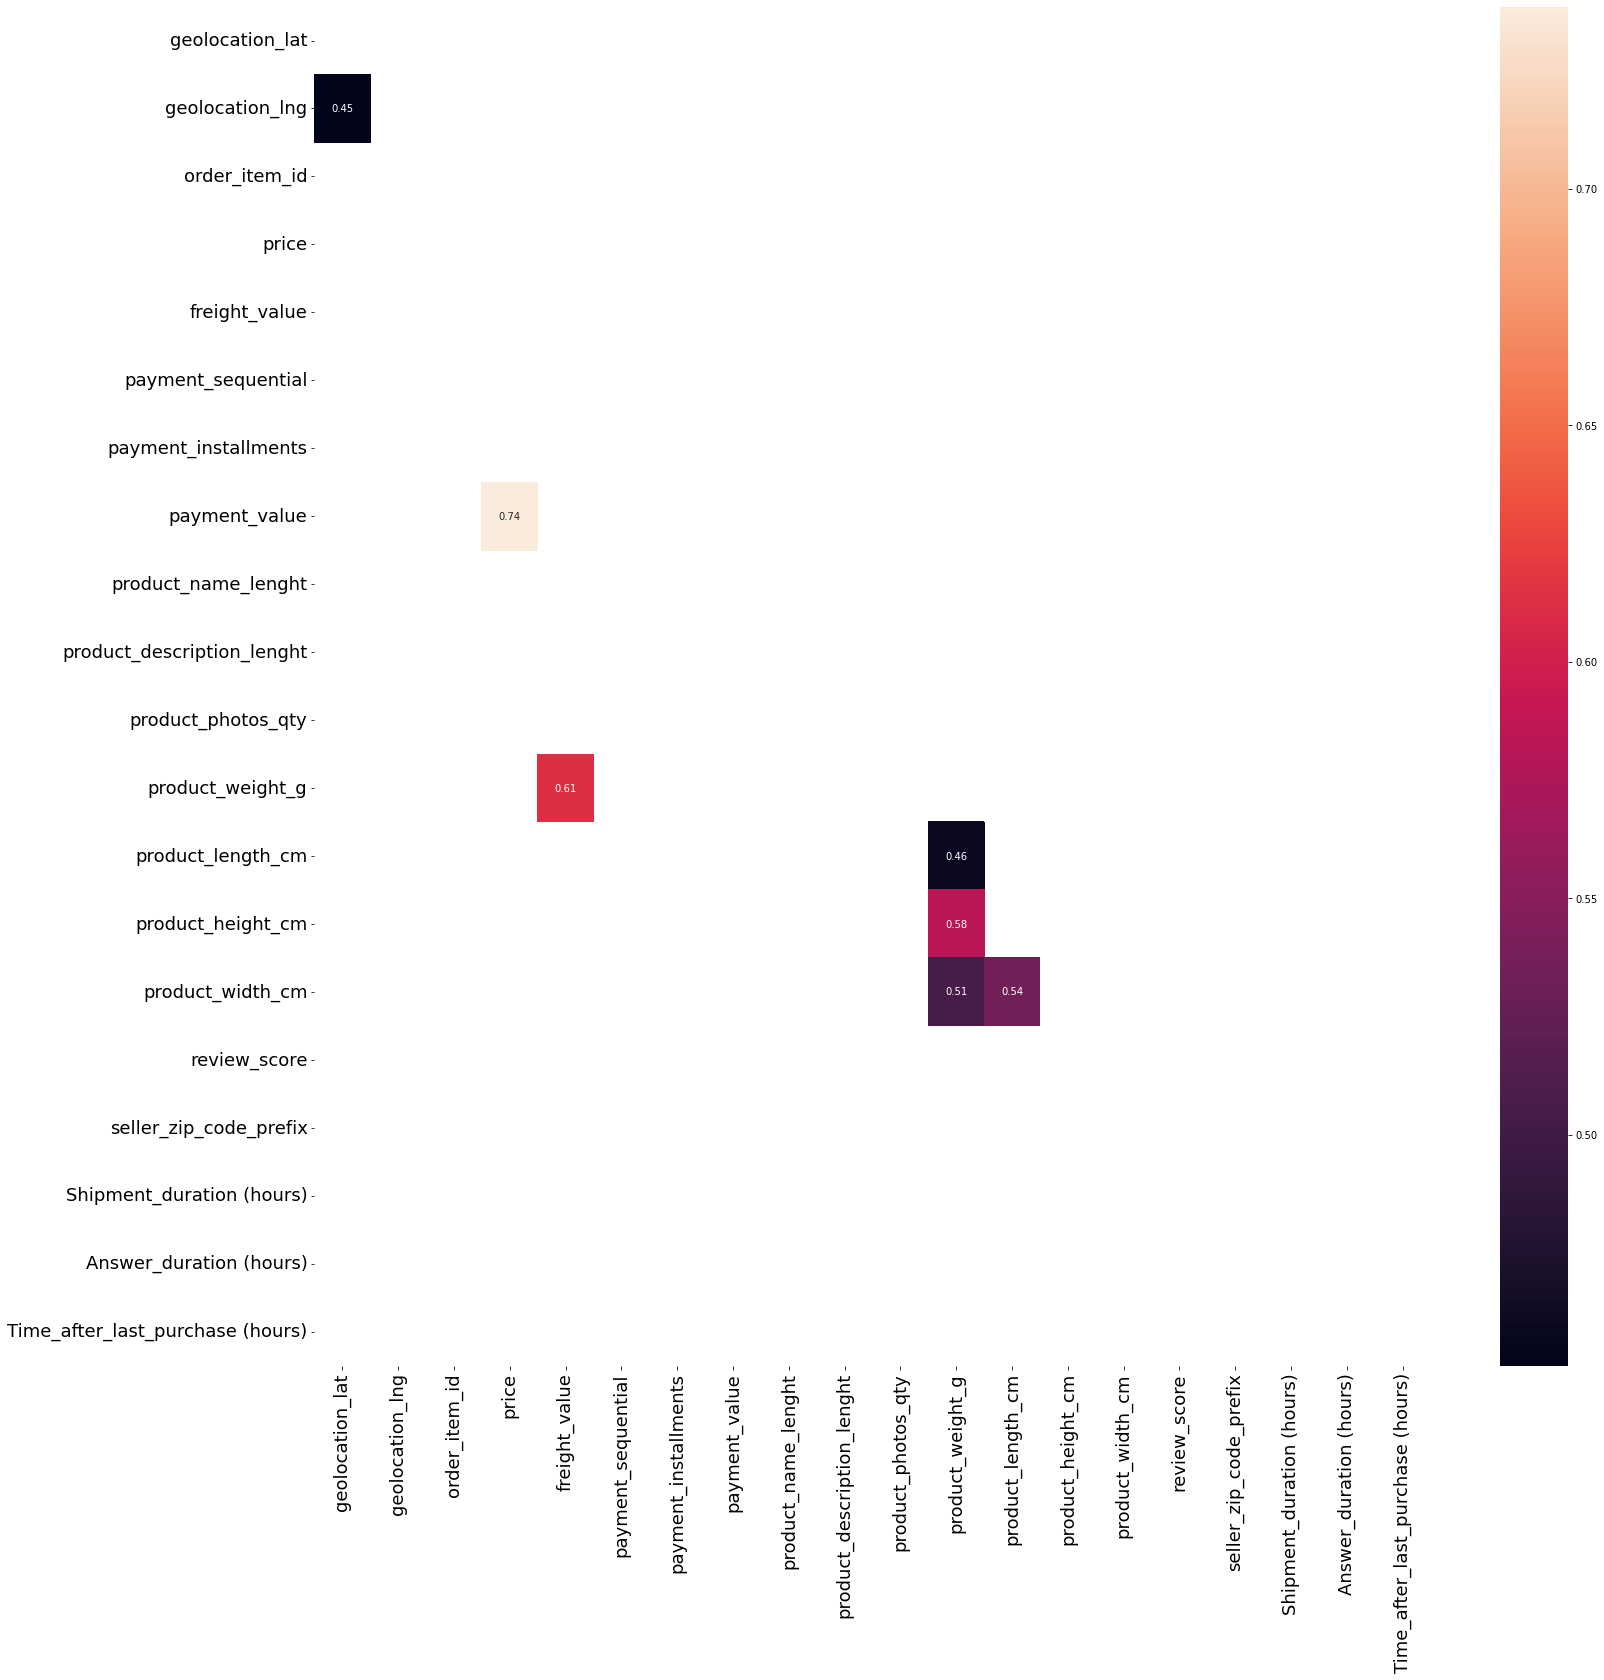

In [183]:
def corr_corr(df=None):
	corr = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			c , p = stats.pearsonr(dfQ[col],dfQ[col2])
			corr[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = c
	return corr


def corr_pvalue(df=None):
	p_matrix = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			c , p = stats.pearsonr(dfQ[col],dfQ[col2])
			p_matrix[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = p
	return p_matrix


p_values = corr_pvalue(dfQ)                   # get p-values
corr = corr_corr(dfQ)                     # get R values
maskP = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
maskR = np.invert(np.tril(corr>0.45))
mask = maskP + maskR

plt.figure(figsize=(25, 25))
ax = sns.heatmap(dfQ.corr(), mask=mask, annot=True)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
figure_pvalue_corr = ax.get_figure()
#figure_pvalue_corr.savefig("heatmap_quantitative_variables_pvalue_corr", dpi=400)

De façon logique les information sur les dimensions ainsi que le poids du produits sont corrélées entre elles. Idem pour les frais de port et le poids du produit.

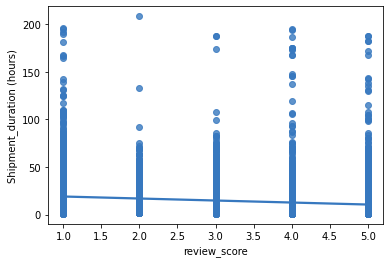

In [184]:
ax = sns.regplot(x=dfQ['review_score'], y=dfQ['Shipment_duration (hours)'], data=dfQ)
stats.pearsonr(dfQ['review_score'],dfQ['Shipment_duration (hours)'])
figure_corr_energyscoreGES = ax.get_figure()
#figure_corr_energyscoreGES.savefig("corr_energyscore et GES", dpi=400)

Comme on peut le confirmer ici, le score de satisfaction n'est pas lié au temps de livraison du produit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


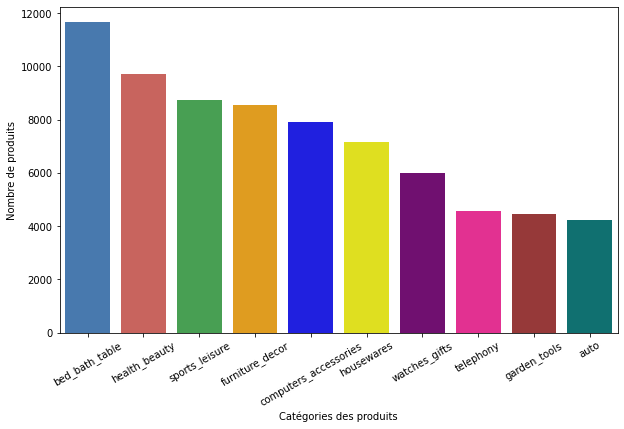

In [203]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
top_ten_produits = df['product_category_name_english'].value_counts().head(10)
ax = sns.barplot(y=top_ten_produits, x=top_ten_produits.index, palette = custom_palette, orient='v')
ax.set_xlabel('Catégories des produits')
ax.set_ylabel('Nombre de produits')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
figure = ax.get_figure()
figure.savefig("nombre de produit par catégorie", dpi=400)
plt.tight_layout()

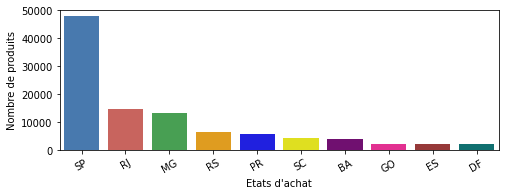

In [204]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
customer_state_frequency = df.groupby(['customer_state']).count().sort_values(by='customer_city', ascending=False)['customer_city'].head(10)
ax = sns.barplot(x = customer_state_frequency.index, y = customer_state_frequency.values, orient='v')
ax.set_xlabel("Etats d'achat")
ax.set_ylabel('Nombre de produits')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
figure = ax.get_figure()
figure.savefig("nombre de produit par états", dpi=400)
plt.tight_layout()

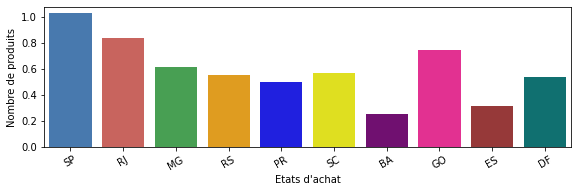

In [205]:
#Normalisons par le nombre d'habitant par état pour avoir une meilleure représentation
# source : https://www.statista.com/statistics/1182302/brazil-population-state/
pop_state = [46649,17463,21411,11466,11597,7338,14985,3094,7206,4108]
plt.figure(figsize=(10, 6))
customer_state_frequency = df.groupby(['customer_state']).count().sort_values(by='customer_city', ascending=False)['customer_city'].head(10)
ax = sns.barplot(x = customer_state_frequency.index, y = customer_state_frequency.values/pop_state, orient='v')
ax.set_xlabel("Etats d'achat")
ax.set_ylabel('Nombre de produits')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
figure = ax.get_figure()
figure.savefig("nombre de produit par états norm", dpi=400)
plt.tight_layout()

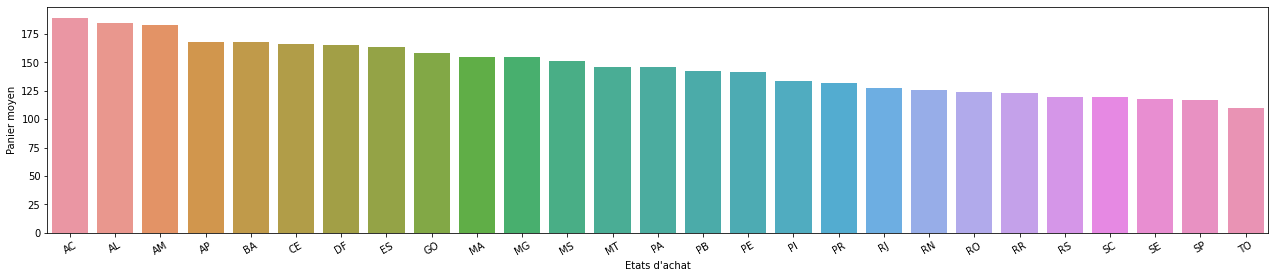

In [206]:
state = df.groupby('customer_state').mean()['price'].head(30).index
price = df.groupby('customer_state').mean()['price'].sort_values(ascending=False).head(30).values
plt.figure(figsize=(20, 6))
ax = sns.barplot(x = state, y = price, orient='v')
ax.set_xlabel("Etats d'achat")
ax.set_ylabel('Panier moyen')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
figure = ax.get_figure()
figure.savefig("panier moyen par états", dpi=400)
plt.tight_layout()

Je veux savoir si certains états ont un panier moyen significativement supérieur à d'autres

Je teste si je peux appliquer en ANOVA en regardant si les données suivent une loi normale et si il y a égalité des variances

In [258]:
for elm in dfQ:
	result_shapiro = stats.shapiro(dfQ[elm])
	if result_shapiro[1]< 0.05:
		print(f"La variable {str(elm)} suit une loi normale (p = {str(result_shapiro[1])} )")
	if result_shapiro[1]> 0.05:
		print(f"La variable {str(elm)} ne suit pas une loi normale (p = {str(result_shapiro[1])} )")

La variable geolocation_lat suit une loi normale (p = 0.0 )
La variable geolocation_lng suit une loi normale (p = 0.0 )
La variable order_item_id suit une loi normale (p = 0.0 )
La variable price suit une loi normale (p = 0.0 )
La variable freight_value suit une loi normale (p = 0.0 )
La variable payment_sequential suit une loi normale (p = 0.0 )
La variable payment_installments suit une loi normale (p = 0.0 )
La variable payment_value suit une loi normale (p = 0.0 )
La variable product_name_lenght suit une loi normale (p = 0.0 )
La variable product_description_lenght suit une loi normale (p = 0.0 )
La variable product_photos_qty suit une loi normale (p = 0.0 )
La variable product_weight_g suit une loi normale (p = 0.0 )
La variable product_length_cm suit une loi normale (p = 0.0 )
La variable product_height_cm suit une loi normale (p = 0.0 )
La variable product_width_cm suit une loi normale (p = 0.0 )
La variable review_score suit une loi normale (p = 0.0 )
La variable seller_zip_code

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [198]:
print(stats.levene(df.price[df.customer_state == "AC"].dropna(), df.price[df.customer_state == "AL"].dropna()))

LeveneResult(statistic=0.005468568596312916, pvalue=0.941078412626934)


Je peux donc faire une ANOVA

In [202]:
model = ols('price ~ customer_state', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
customer_state,2.127716e+07,26.0,25.087758,1.713352e-120
Residual,3.681871e+09,112873.0,NaN,NaN


Il y a bien un effet "état", le panier moyen est significativement différent entre les états

Regardons entre quels états avec un test post-hoc de tuckey :

In [200]:
Results = multi.MultiComparison(df['price'], df['customer_state'])
Results = Results.tukeyhsd(alpha=0.05)
print(Results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
    AC     AL  -1.7487    0.9   -78.332  74.8345  False
    AC     AM -52.0858 0.8847 -138.7697  34.5981  False
    AC     AP -19.3937    0.9 -120.7882  82.0008  False
    AC     BA -50.9282 0.5804 -121.3648  19.5084  False
    AC     CE -29.7804    0.9 -101.5315  41.9707  False
    AC     DF -56.8066 0.3751 -127.8421   14.229  False
    AC     ES -67.1352 0.0951 -138.1426   3.8721  False
    AC     GO -58.6068  0.305  -129.593  12.3795  False
    AC     MA -38.3846    0.9 -111.8652  35.0959  False
    AC     MG -64.6691 0.1191 -134.5171   5.1789  False
    AC     MS -41.8426    0.9 -115.1743  31.4891  False
    AC     MT -38.7179    0.9 -111.2899  33.8541  False
    AC     PA -25.7998    0.9  -98.3801  46.7805  False
    AC     PB   4.9946    0.9  -69.7329  79.7221  False
    AC     PE -42.8913 0.8845 -114.2627    28.48

On remarque que l'état "**AL**" qui correspond à l'***Alagoas*** est significativement différent de beaucoup d'état. C'est en accord avec ce que l'on sait de cet état qui est peu peuplé mais globalement plus riche que la moyenne (ancien état colonialiste avec de grandes familles et un tourisme important)

In [207]:
df.to_csv('data_projet4_clean.csv', sep='\t', index=False)